In [1]:
import flipflopinertial as ffi
import flipflopanalytical as ff
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
from scipy.special import erfc
from scipy.integrate import simps # used for normalization of simulated pdfs

# set up a custom colormap
from matplotlib.colors import LinearSegmentedColormap
cm_data = np.loadtxt("batlow.txt")
batlow = LinearSegmentedColormap.from_list('batlow', cm_data)
x = np.linspace(0,1,25)
np.random.shuffle(x)
import cycler
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color',batlow(x))
x = np.array([0.0, 0.25, 0.5, 0.6,0.7])
colors = batlow(x)[::-1]
c5,c4,c3,c2,c1=colors

# set the latex font
#plt.rcParams.update({
#    "text.usetex": True,})
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

In [15]:
c5*255

array([229.88627451, 151.87058824,  89.04705882, 255.        ])

In [14]:
np.array(batlow(1))*255

array([ 10.36078431,  43.17254902,  92.18039216, 255.        ])

# Figure 3 demonstrates the displacement statistics of moving particles
uses the exact model rather than the overdamped one.

(0.0, 0.225)

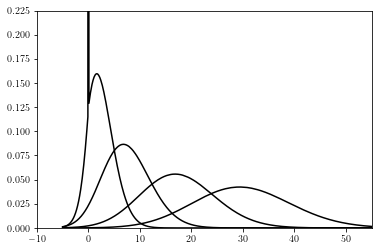

In [3]:
# finding some nice parameters for which to plot the analytical distributions
X = np.arange(-5,90,0.1)
T = np.array([5, 15, 35, 60])
ke = 1
kd = 1
V = 1
D = 1.25
x0 = V/kd # for scaling.
k0 = ke+kd# for scaling
p = ff.P(X,T,ke,kd,V,D) # calculate analytical distribution.

for o in p.T:
    plt.plot(X,o,color='black')
plt.xlim(-10,55)
plt.ylim(0,0.225)

In [15]:
# doing numerical calculors[::-1]ations to fit the above distributions
# this takes a while. on order of 2-3 minutes
Np = 500000 #100000 # number of particles
L = 0 # this forces all particles to start at x=0 in a roundabout way
dt = 5e-2
stop=False

gam = 1/(0.1/kd) # inverse relaxation time. Needs to be large.
Gam = D*gam**2 # velocity diffusivity
#T = np.array([5,20,40,60]) # will this work..

adaptive=0 # no adaptation of thetimestep
params = [ke,kd,gam,Gam,V,T,Np,L,dt,stop,adaptive]
sys = ffi.system(*params) 
sys = np.array(sys) # last dim here is the time. first is the particle (from among the Np)
np.save('fig2_pdf_simul_test',sys)

(-0.0, 0.2)

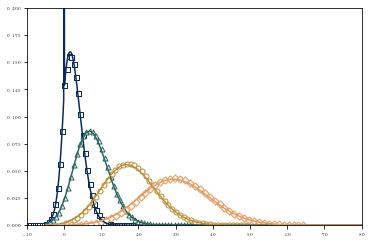

In [16]:
sys = np.load('fig2_pdf_simul_test.npy')
upperlims=[20,35,50,65]
lowerlims=[-10,-5,0,0]
binarrs = [np.linspace(l,u,50) for l,u in zip(lowerlims,upperlims)]
markers = ['s','^','o','D']
markersizes=[4,5,3,5]
#x = np.linspace(-10,80,750)
colarr = [c1,c2,c4,c5]
for i,(o,c,m,ms,bins) in enumerate(zip(p.T,colarr,markers,markersizes,binarrs)):
    plt.plot(X,o,color=c)
    h,b = np.histogram(sys[:, 0, i],bins=bins)
    #b = b[:-1]
    b = (b[1:]+b[:-1])/2.0
    h = h/simps(h,b)
    #np.save('../simul/fig2_time_{}'.format(i), (b,h))
    plt.scatter(b,h,marker=m,edgecolor=c,facecolor='white',s=25)
plt.xlim(-10,80)
plt.ylim(-0.0,0.2)
# so there is good agreement. 

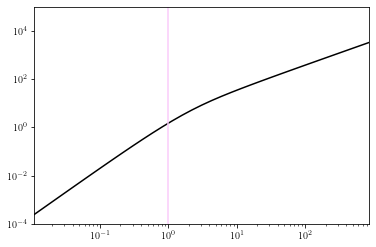

In [5]:
# now calculate the variance analytically
ke=0.1
kd=1
D = 0.5 # spatial diffusivity
V=5
t1 = 1/(ke+kd) # for scaling later
l1 = V/kd # for scaling
gam = 1/(0.1/kd) # inverse relaxation time. Needs to be large.
Gam = D*gam**2 # velocity diffusivity

# set it up so 40% of the plot is to the left of tau=1/k.
tau = 1/(ke+kd)
tmin=1e-2
tmax=tau*10**(np.log10(tau/tmin)*60/40)
Ts = np.geomspace(tmin,tmax,35)  # set of sampling times...
varA = ff.var(Ts/tau,ke,kd,V,0) #analytical variance
plt.loglog(Ts/tau,varA,color='black')

plt.xlim(tmin/tau,tmax/tau)
plt.ylim(1e-4,1e5)
plt.axvline(1)

In [6]:
dt = tmin/35
Np = 15000
maxdt=5.0 # maximum timestep
stop=False
L=0
varsys = np.array(ffi.system(ke,kd,gam,Gam,V,Ts,Np,L,dt,stop,adaptive=maxdt))
varN = varsys[:,0,:].var(0)
np.save('variance',np.array([Ts,varN]))

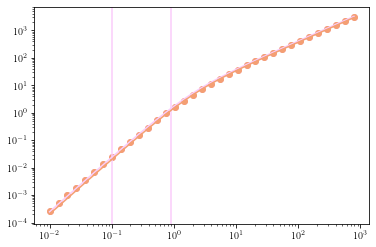

In [7]:
plt.loglog(Ts,varA)
plt.scatter(Ts,varN)
plt.axvline(1/(ke+kd))
plt.axvline(1/gam)
def f(T):
    k=ke+kd
    return 2*V**2*ke*kd/k**4*(k*T+np.exp(-k*T)-1)

plt.loglog(Ts,f(Ts))
plt.scatter(Ts,varN)

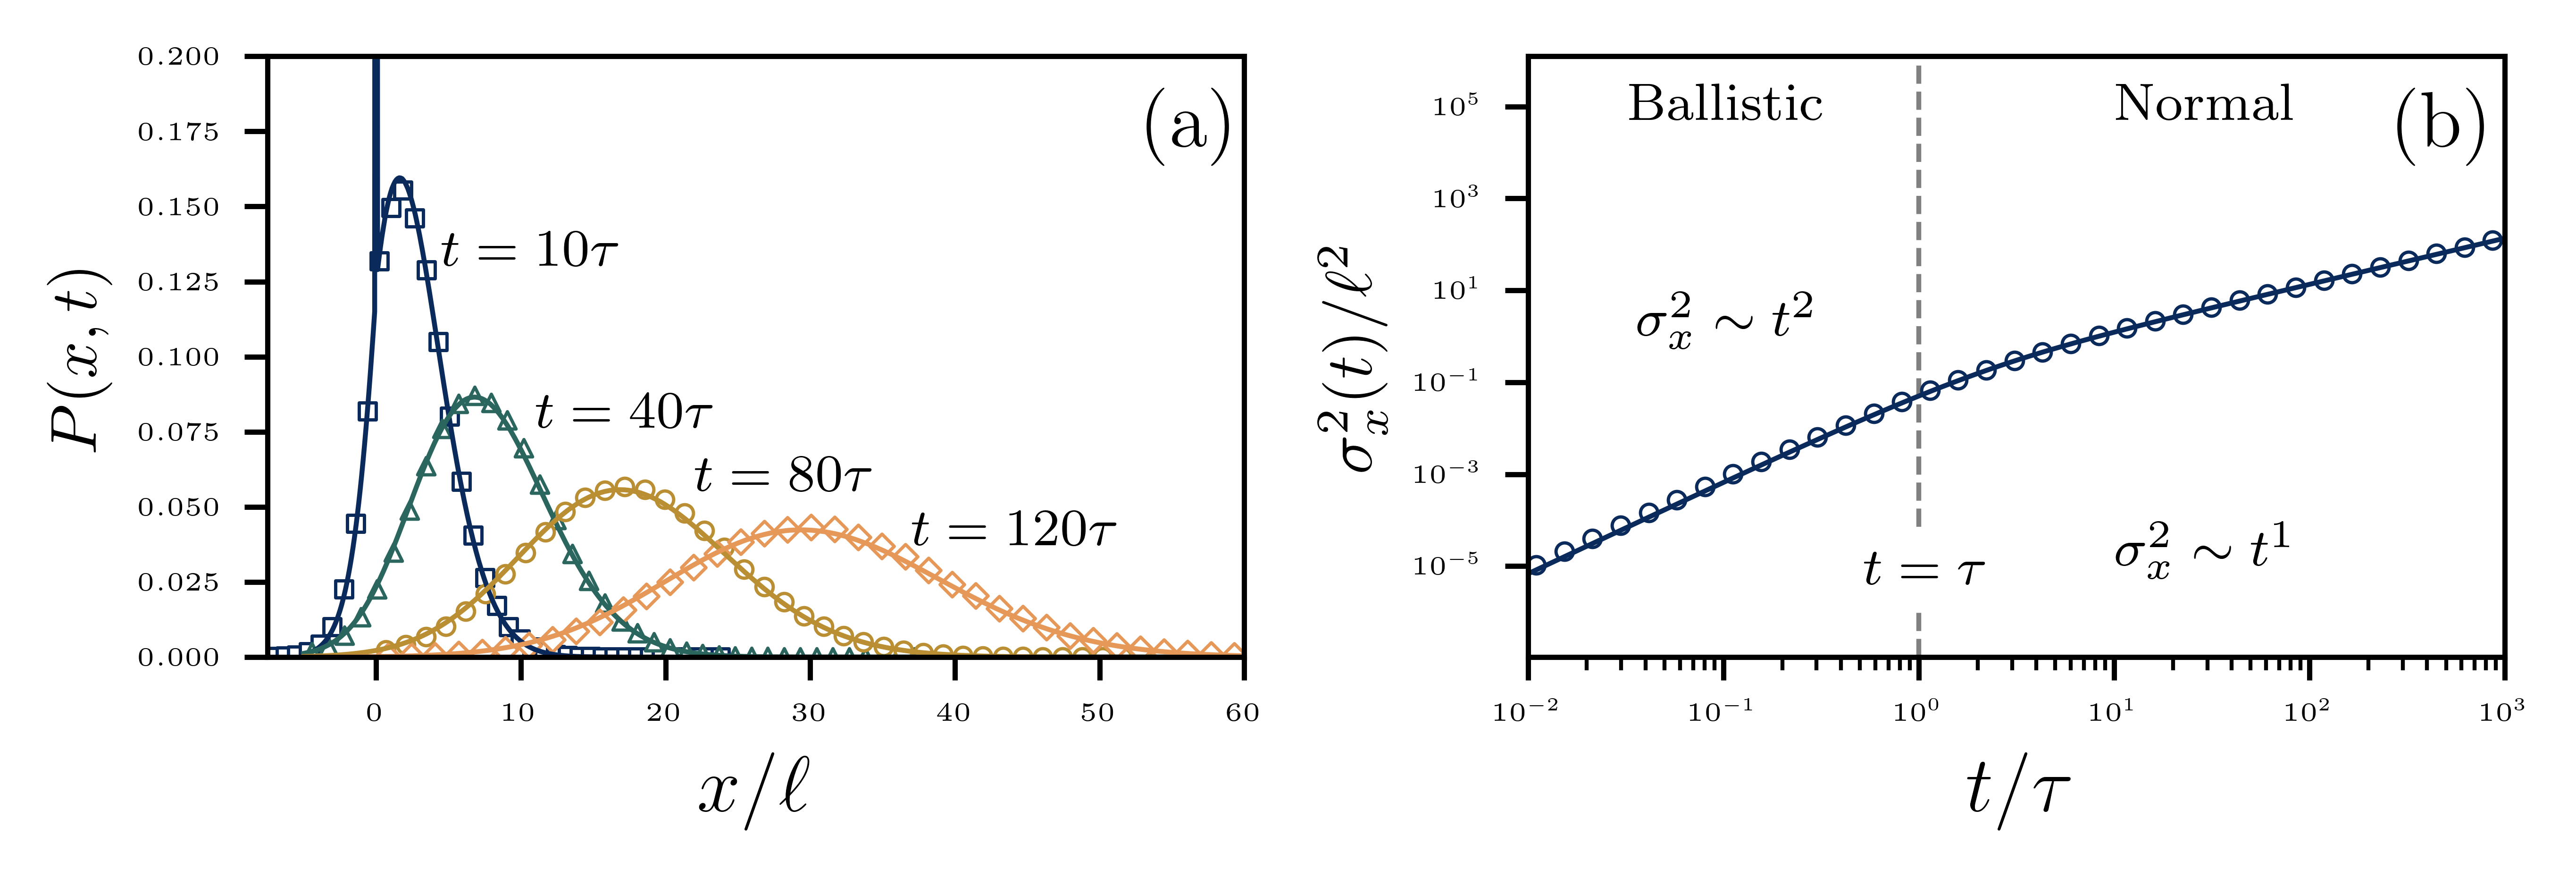

In [31]:
# now form the plot.
t = np.geomspace(1e-6,5e6,1000)
k = ke+kd
l1 = V/kd
t1 = 1/k
xsmol = 4
smol = 6 # the font sizes
med = 8
medlar=10
lar = 12
plt.rc('font',size=med)
plt.rc('axes',titlesize=med)
plt.rc('axes',labelsize=lar)
plt.rc('xtick',labelsize=xsmol)
plt.rc('ytick',labelsize=xsmol)
plt.rc('legend',fontsize=med)
plt.rc('figure',titlesize=med)

w = 5.50 # width in inches
h = 1.9 # height

fig, (ax1,ax2) = plt.subplots(nrows=1,
                              ncols=2,
                              figsize=(w,h),
                              dpi=1000,
                              tight_layout=True)


#########################################################
# leftmost panel
#########################################################

#########################################################
# left panel
#########################################################
upperlims=[25,40,55,65]
lowerlims=[-7.5,-5,0,0]
binarrs = [np.arange(l,u,(u-l)/40) for l,u in zip(lowerlims,upperlims)]
markers = ['s','^','o','D']
markersizes=[4,5,3,3]
colarr = [c1,c2,c4,c5]

for i,(o,c,m,ms,bins) in enumerate(zip(p.T,colarr,markers,markersizes,binarrs)):
    ax1.plot(X/x0,o,color=c,lw=0.75)
    #################### TURN ME BACK ON
    h,b = np.histogram(sys[:, 0, i],bins=bins)
    b = (b[1:]+b[:-1])/2.0
    #if i in [0,1]: # different ways to select bins.. n+1 -> n
    #    b = (b[1:]+b[:-1])/2.0  # this works better for small bins
    #else:
    #    b = b[:-1] # this works better for large bins
    h = h/simps(h,b) # normalize the empirical pdf
    ax1.scatter(b/x0,h,marker=m,edgecolor=c,facecolor='white',s=7,lw=0.5,zorder=1)
xmin=-7.5/x0
xmax= 60/x0
ax1.set_xlim(xmin,xmax)
pmin = 0.0
pmax = 0.2
ax1.set_ylim(pmin,pmax)

##########################################################
# right panel
##########################################################
Ts2 = np.geomspace(Ts[0]/2,Ts[-1]*2,100)
varA = ff.var(Ts2,ke,kd,V,0.0) #analytical variance
ax2.loglog(Ts2/tau,varA/l1**2,color=colors[-1],lw=0.75)
ax2.scatter(Ts/tau,varN/l1**2,marker='o',s=7,edgecolor=colors[-1],facecolor='white',lw=0.5,zorder=1)

ax2.axvline(1,color='grey',linestyle='--',lw=0.75,zorder=-1) # crossover times

ax2.set_xlim(1e-2,1e3)
varmax = varN.max()*1e4/l1**2
varmin = varN.min()/1e2/l1**2
ax2.set_ylim(varmin,varmax)

##########################################################
# text elements
##########################################################
# panel labels
fx = 0.9 # fraction of the panel at which to place text in x dir
fy = 0.85 # and in the y dir

ax1.text(xmin+(xmax-xmin)*fx,
         pmin+(pmax-pmin)*fy,
         '(a)',
         fontsize=lar)
ax2.text(10**(np.log10(tmax/tmin)*fx+np.log10(tmin/t1)),
         10**(np.log10(varmax/varmin)*fy+np.log10(varmin)),
         '(b)',
         fontsize=lar)

# axis labels
ax1.set_xlabel("$x/\ell$",fontsize=lar)
ax1.set_ylabel("$P(x,t)$",fontsize=medlar)
ax2.set_xlabel(r"$t/\tau$",fontsize=lar)
ax2.set_ylabel(r"$\sigma_x^2(t)/\ell^2$",fontsize=medlar)

# panel b crossover label
fyc = 0.12 # percent up in y dir to place the label.
ax2.text(1.05,
         10**(np.log10(varmax/varmin)*fyc+np.log10(varmin)),
         r"$t=\tau$",ha='center',fontsize=med,
         bbox=dict(facecolor='white', edgecolor='none', pad=2.35),zorder=1)

# timestamps in panel a
p1 = (4.5/x0, 0.13)
p2 = (11/x0, 0.076)
p3 = (22/x0, 0.055)
p4 = (37/x0, 0.037)
ax1.text(*p1, r"$t=10 \tau$",fontsize=med,color='black')
ax1.text(*p2, r"$t=40 \tau$",fontsize=med,color='black')
ax1.text(*p3, r"$t=80\tau$",fontsize=med,color='black')
ax1.text(*p4, r"$t=120\tau$",fontsize=med,color='black')

# labelling of phases..
tt2 = np.sqrt(tmin*tau)/tau
tt3 = np.sqrt(tau*tmax)/tau
ax2.text(tt2,5e4,'Ballistic',ha='center',fontsize=med)
ax2.text(tt3,5e4,'Normal',ha='center',fontsize=med)

# slope keys in panel b
# move these in inkscape...
ax2.text(tt2,1e0,r"$\sigma_x^2 \sim t^2$",fontsize=med,ha='center')
ax2.text(tt3,1e-5,r"$\sigma_x^2 \sim t^1$",fontsize=med,ha='center')

plt.savefig('../figures/figure2.pdf', dpi=600)
plt.show()

In [27]:
c2*255

array([ 42.49803922, 101.40784314,  93.90980392, 255.        ])

 it remains to move the slope keys in inkscape